# Uso de framework o biblioteca de aprendizaje máquina para la implementación de una solución.

In [1]:
import pandas as pd
import numpy as np
from sklearn import linear_model
from sklearn import model_selection
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
import seaborn as sb
%matplotlib inline

In [2]:
#dataset utilizado - "heart_2020_cleaned.csv"
df = pd.read_csv(r"heart_2020_cleaned.csv")
test = df.sample(10) #numero de valores a usar para prediccion
train = df[~df.isin(test)] #valores a usar para entrenamiento
train.dropna(inplace = True)

El tipo de problema que se resolverá es por clasificación, esto debido a que solo hay dos posibles salidas, 1 o 0 (binario)

In [3]:
train.head()

,HeartDisease,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Sex,AgeCategory,Race,Diabetic,PhysicalActivity,GenHealth,SleepTime,Asthma,KidneyDisease,SkinCancer
0,No,16.60,Yes,No,No,3.0,30.0,No,Female,55-59,White,Yes,Yes,Very good,5.0,Yes,No,Yes
1,No,20.34,No,No,Yes,0.0,0.0,No,Female,80 or older,White,No,Yes,Very good,7.0,No,No,No
2,No,26.58,Yes,No,No,20.0,30.0,No,Male,65-69,White,Yes,Yes,Fair,8.0,Yes,No,No
3,No,24.21,No,No,No,0.0,0.0,No,Female,75-79,White,No,No,Good,6.0,No,No,Yes
4,No,23.71,No,No,No,28.0,0.0,Yes,Female,40-44,White,No,Yes,Very good,8.0,No,No,No


Mostramos la información de nuestro dataset

In [4]:
print(train.describe())

                 BMI  PhysicalHealth   MentalHealth      SleepTime
count  319785.000000   319785.000000  319785.000000  319785.000000
mean       28.325356        3.371778       3.898369       7.097096
std         6.356092        7.950954       7.955207       1.435982
min        12.020000        0.000000       0.000000       1.000000
25%        24.030000        0.000000       0.000000       6.000000
50%        27.340000        0.000000       0.000000       7.000000
75%        31.420000        2.000000       3.000000       8.000000
max        94.850000       30.000000      30.000000      24.000000


In [5]:
from sklearn import preprocessing #convertimos los Yes y No de HeartDisease en binario
label = preprocessing.LabelEncoder()

train['HeartDisease']= label.fit_transform(train['HeartDisease'])
test['HeartDisease']= label.fit_transform(test['HeartDisease'])
print(train['HeartDisease'].unique())

[0 1]


Convertimos todos nuestros valores para poder utilizarlos en el modelo

In [6]:
train['Smoking']= label.fit_transform(train['Smoking'])
test['Smoking']= label.fit_transform(test['Smoking'])
print(train['Smoking'].unique())

[1 0]


In [7]:
train['AlcoholDrinking']= label.fit_transform(train['AlcoholDrinking'])
test['AlcoholDrinking']= label.fit_transform(test['AlcoholDrinking'])
print(train['AlcoholDrinking'].unique())

[0 1]


In [8]:
train['Stroke']= label.fit_transform(train['Stroke'])
test['Stroke']= label.fit_transform(test['Stroke'])
print(train['Stroke'].unique())

[0 1]


In [9]:
train['DiffWalking']= label.fit_transform(train['DiffWalking'])
test['DiffWalking']= label.fit_transform(test['DiffWalking'])
print(train['DiffWalking'].unique())

[0 1]


In [10]:
train['Sex']= label.fit_transform(train['Sex'])
test['Sex']= label.fit_transform(test['Sex'])
print(train['Sex'].unique())

[0 1]


In [11]:
train['Race']= label.fit_transform(train['Race'])
test['Race']= label.fit_transform(test['Race'])
print(train['Race'].unique())

[5 2 1 0 4 3]


In [12]:
train['Diabetic']= label.fit_transform(train['Diabetic'])
test['Diabetic']= label.fit_transform(test['Diabetic'])
print(train['Diabetic'].unique())

[2 0 1 3]


In [13]:
train['AgeCategory']= label.fit_transform(train['AgeCategory'])
test['AgeCategory']= label.fit_transform(test['AgeCategory'])
print(train['AgeCategory'].unique())

[ 7 12  9 11  4 10  8  6  5  0  3  2  1]


In [14]:
train['PhysicalActivity']= label.fit_transform(train['PhysicalActivity'])
test['PhysicalActivity']= label.fit_transform(test['PhysicalActivity'])
print(train['PhysicalActivity'].unique())

[1 0]


In [15]:
train['GenHealth']= label.fit_transform(train['GenHealth'])
test['GenHealth']= label.fit_transform(test['GenHealth'])
print(train['GenHealth'].unique())

[4 1 2 3 0]


In [16]:
train['Asthma']= label.fit_transform(train['Asthma'])
test['Asthma']= label.fit_transform(test['Asthma'])
print(train['Asthma'].unique())

[1 0]


In [17]:
train['KidneyDisease']= label.fit_transform(train['KidneyDisease'])
test['KidneyDisease']= label.fit_transform(test['KidneyDisease'])
print(train['KidneyDisease'].unique())

[0 1]


In [18]:
train['SkinCancer']= label.fit_transform(train['SkinCancer'])
test['SkinCancer']= label.fit_transform(test['SkinCancer'])
print(train['SkinCancer'].unique())

[1 0]


In [19]:
train.describe()

,HeartDisease,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Sex,AgeCategory,Race,Diabetic,PhysicalActivity,GenHealth,SleepTime,Asthma,KidneyDisease,SkinCancer
count,319785.000000,319785.000000,319785.000000,319785.000000,319785.000000,319785.000000,319785.000000,319785.000000,319785.000000,319785.000000,319785.000000,319785.000000,319785.000000,319785.000000,319785.000000,319785.000000,319785.000000,319785.000000
mean,0.085595,28.325356,0.412480,0.068099,0.037741,3.371778,3.898369,0.138871,0.475272,6.514558,4.396735,0.300396,0.775362,2.220939,7.097096,0.134065,0.036834,0.093244
std,0.279766,6.356092,0.492281,0.251916,0.190569,7.950954,7.955207,0.345813,0.499389,3.564748,1.212219,0.716489,0.417345,1.534633,1.435982,0.340723,0.188355,0.290774
min,0.000000,12.020000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000
25%,0.000000,24.030000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4.000000,5.000000,0.000000,1.000000,1.000000,6.000000,0.000000,0.000000,0.000000
50%,0.000000,27.340000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,7.000000,5.000000,0.000000,1.000000,2.000000,7.000000,0.000000,0.000000,0.000000
75%,0.000000,31.420000,1.000000,0.000000,0.000000,2.000000,3.000000,0.000000,1.000000,9.000000,5.000000,0.000000,1.000000,4.000000,8.000000,0.000000,0.000000,0.000000
max,1.000000,94.850000,1.000000,1.000000,1.000000,30.000000,30.000000,1.000000,1.000000,12.000000,5.000000,3.000000,1.000000,4.000000,24.000000,1.000000,1.000000,1.000000


<ipython-input-20-95f54c999b81>:1: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  train.drop(['HeartDisease'],1).hist() #se muestra el dataset


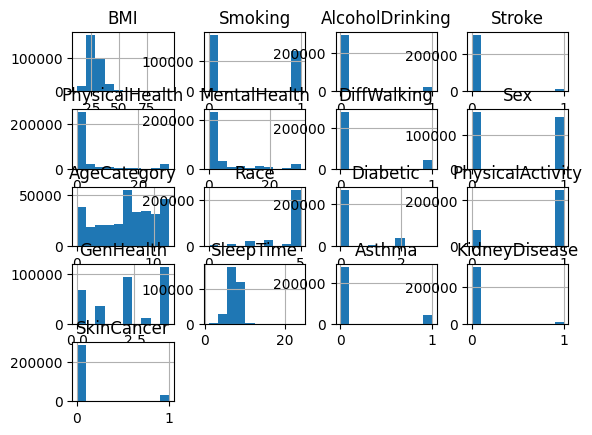

In [20]:
train.drop(['HeartDisease'],1).hist() #se muestra el dataset
plt.show()

Separamos nuestros datos de entrenamiento en "x" y "y"

In [21]:
X = np.array(train.drop(['HeartDisease'],1))
y = np.array(train['HeartDisease'])
X.shape

<ipython-input-21-e68f5b06cbe6>:1: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  X = np.array(train.drop(['HeartDisease'],1))


(319785, 17)

In [22]:
model = linear_model.LogisticRegression() #modelo de regresion logistica
model.fit(X,y)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [23]:
Y = np.array(test.drop(['HeartDisease'],1))
results = np.array(test['HeartDisease'])
Y.shape

<ipython-input-23-5649dccb1c56>:1: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  Y = np.array(test.drop(['HeartDisease'],1))


(10, 17)

In [24]:
#Mostramos las predicciones con nuestros datos de test
predictions = model.predict(Y)
print(predictions)

[0 0 0 0 0 0 0 0 0 0]


In [25]:
#mostramos la y real
print(test['HeartDisease'])

303930    0
84858     0
247816    0
290360    0
216917    0
256017    1
254438    0
70976     0
166688    0
194299    0
Name: HeartDisease, dtype: int64


In [26]:
model.score(Y, results)

0.9

# Análisis y Reporte sobre el desempeño del modelo.

In [27]:
param_grid = {'C': [0.001, 0.01, 0.1, 1, 10, 100]}

In [29]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import  GridSearchCV
# Crear un objeto de modelo de regresión logística
logistic = LogisticRegression()

In [30]:
# Realizar la búsqueda de hiperparámetros utilizando validación cruzada
grid_search = GridSearchCV(logistic, param_grid, cv=5)
grid_search.fit(X, y)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _c

GridSearchCV(cv=5, estimator=LogisticRegression(),
             param_grid={'C': [0.001, 0.01, 0.1, 1, 10, 100]})

In [31]:
# Mostrar los mejores hiperparámetros encontrados
best_params = grid_search.best_params_
print("Mejores hiperparámetros:", best_params)

# Entrenar un modelo con los mejores hiperparámetros en el conjunto de entrenamiento completo
best_logistic = LogisticRegression(C=best_params['C'])
best_logistic.fit(X, y)

Mejores hiperparámetros: {'C': 0.001}


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(C=0.001)

In [32]:
# Evaluar el modelo ajustado en el conjunto de prueba
accuracy = best_logistic.score(Y, results)
print("Exactitud en el conjunto de prueba:", accuracy)

Exactitud en el conjunto de prueba: 0.9


Diagnóstico de Bias, Varianza y Ajuste del modelo

In [34]:
from sklearn.model_selection import train_test_split

# Dividir los datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Dividir el conjunto de entrenamiento en entrenamiento y validación
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=42)


In [35]:
# Calcular la precisión en el conjunto de entrenamiento
train_accuracy = model.score(X_train, y_train)

# Calcular la precisión en el conjunto de validación
val_accuracy = model.score(X_val, y_val)

# Calcular la precisión en el conjunto de prueba
test_accuracy = model.score(X_test, y_test)

print("Precisión en entrenamiento:", train_accuracy)
print("Precisión en validación:", val_accuracy)
print("Precisión en prueba:", test_accuracy)


Precisión en entrenamiento: 0.9150404080874808
Precisión en validación: 0.9156275651800023
Precisión en prueba: 0.9145363290961115


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _c

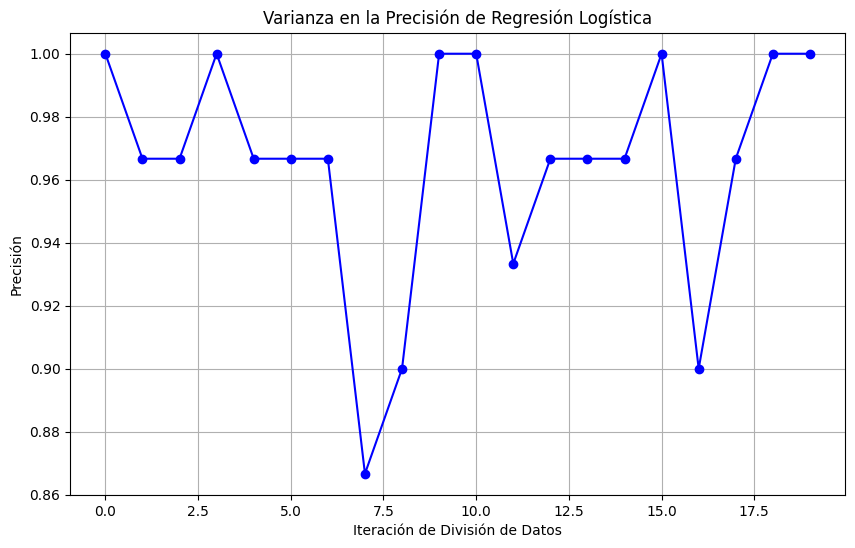

In [40]:
from sklearn.datasets import load_iris

# Cargar el conjunto de datos (ejemplo con el conjunto de datos Iris)
data = load_iris()
X = data.data
y = data.target

# Definir la cantidad de divisiones
num_splits = 20
test_size = 0.2
# Listas para almacenar métricas de evaluación
accuracies = []

# Realizar múltiples divisiones y evaluaciones
for i in range(num_splits):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size, random_state=i)

    # Crear y entrenar el modelo de regresión logística
    model = LogisticRegression()
    model.fit(X_train, y_train)

    # Realizar predicciones en el conjunto de prueba
    y_pred = model.predict(X_test)

    # Calcular la precisión y almacenarla
    accuracy = accuracy_score(y_test, y_pred)
    accuracies.append(accuracy)

# Graficar la varianza en las métricas de evaluación (precisión)
plt.figure(figsize=(10, 6))
plt.plot(range(num_splits), accuracies, marker='o', linestyle='-', color='b')
plt.xlabel('Iteración de División de Datos')
plt.ylabel('Precisión')
plt.title('Varianza en la Precisión de Regresión Logística')
plt.grid(True)
plt.show()


# Interpretación
En regresión logística el diagnostico de bias, varianza se relaciona mas con la precisión numerica de nuestro modelo, por lo que no es facil visualizarlo en gráficas, en la gráfica anterior se muestra la estabilidad de como funcionaría en predicciones futuras, sin embargo para visualizar estas gráficas se requiere el uso de un modelo más complejo.

De acuerdo con estos valores podemos interpretar que el ajuste del modelo es optimo, no tenemos underfitting ni overfitting, esto de acuerdo a la precisión tanto en entrenamiento como en validación, ambas son adecuadas, la diferencia entre estas es mínima, por lo que el ajuste es el óptimo.

En cuanto a la varianza podemos concluir que el nivel es adecuado, la diferencia entre la precisión de validación y entrenamiento es mínima, por lo que la varianza no es ni muy alta ni muy baja.

Por último en cuanto a la Bias podemos indicar que tiene un bajo sesgo, lo que quiere decir que el modelo se ajusta correctamente a los datos de entrenamiento y a la validación, a diferencia de si el sesgo fuera alto, lo cual nos diría que el modelo no se ajusta bien y es demasiado simple.